In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [4]:
tf.__version__

'2.0.0'

In [5]:
df = pd.read_excel("data/Churn_Modelling.xlsx")

In [6]:
df = df[['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [7]:
Geography_df = pd.get_dummies(df["Geography"], drop_first=True)
Gender_df = pd.get_dummies(df["Gender"], drop_first=True)

In [8]:
df = pd.concat([df,Geography_df,Gender_df], axis=1)

In [9]:
X = df[df.columns.difference(['Exited', 'Gender','Geography'])]
y = df['Exited']

In [10]:
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

In [11]:
X_trans.shape

(10000, 11)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)

In [13]:
def get_model():
    model = Sequential()
    model.add(Dense(6,kernel_initializer = 'uniform', activation = 'relu', input_dim=X_trans.shape[1]))
    model.add(Dropout(0.1))
    model.add(Dense(6,kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    #model.summary()
    return model

In [14]:
model = get_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [15]:
fit_history = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
8000/8000 [==============================] - 2s 254us/step - loss: 0.4729 - accuracy: 0.8010
Epoch 2/100
8000/8000 [==============================] - 2s 198us/step - loss: 0.4304 - accuracy: 0.8149
Epoch 3/100
8000/8000 [==============================] - 2s 196us/step - loss: 0.4281 - accuracy: 0.8236
Epoch 4/100
8000/8000 [==============================] - 2s 203us/step - loss: 0.4227 - accuracy: 0.8270
Epoch 5/100
8000/8000 [==============================] - 2s 202us/step - loss: 0.4228 - accuracy: 0.8246
Epoch 6/100
8000/8000 [==============================] - 1s 184us/step - loss: 0.4199 - accuracy: 0.8273
Epoch 7/100
8000/8000 [==============================] - 1s 170us/step - loss: 0.4228 - accuracy: 0.8225
Epoch 8/100
8000/8000 [==============================] - 1s 133us/step - loss: 0.4188 - accuracy: 0.8232
Epoch 9/100
8000/8000 [==============================] - 1s 100us/step - loss: 0.4176 - accuracy: 0.8263
Epoch 10/100
8000/8000 [==============================]

8000/8000 [==============================] - 2s 205us/step - loss: 0.4002 - accuracy: 0.8307
Epoch 79/100
8000/8000 [==============================] - 2s 201us/step - loss: 0.4010 - accuracy: 0.8301
Epoch 80/100
8000/8000 [==============================] - 2s 208us/step - loss: 0.4009 - accuracy: 0.8310
Epoch 81/100
8000/8000 [==============================] - 2s 206us/step - loss: 0.3981 - accuracy: 0.8340
Epoch 82/100
8000/8000 [==============================] - 2s 207us/step - loss: 0.4008 - accuracy: 0.8291
Epoch 83/100
8000/8000 [==============================] - 2s 207us/step - loss: 0.4008 - accuracy: 0.8314
Epoch 84/100
8000/8000 [==============================] - 2s 209us/step - loss: 0.4024 - accuracy: 0.8320
Epoch 85/100
8000/8000 [==============================] - 2s 212us/step - loss: 0.3992 - accuracy: 0.8353
Epoch 86/100
8000/8000 [==============================] - 2s 209us/step - loss: 0.4038 - accuracy: 0.8304
Epoch 87/100
8000/8000 [==============================] - 2

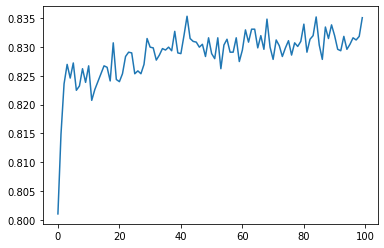

In [16]:
plt.plot(fit_history.history["accuracy"])
#plt.plot(fit_history.history["val_acc"])
plt.show()

In [17]:
y_pred = model.predict_classes(X_test)

In [18]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

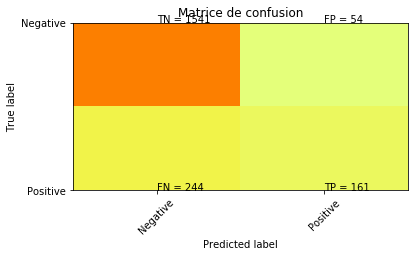

In [22]:
from sklearn.metrics import confusion_matrix
confusio_matrix(y_test, y_pred)

In [21]:
def confusio_matrix(y_test, y_predicted):
  cm = confusion_matrix(y_test, y_predicted)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title('Matrice de confusion')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  plt.show()

In [23]:
def build_classifier(optimizer='adam'):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [24]:
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [10, 20],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10)
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/10
7200/7200 [==============================] - 1s 92us/step - loss: 0.5514 - accuracy: 0.7954
Epoch 2/10
7200/7200 [==============================] - 1s 76us/step - loss: 0.4346 - accuracy: 0.7971
Epoch 3/10
7200/7200 [==============================] - 1s 74us/step - loss: 0.4299 - accuracy: 0.7971
Epoch 4/10
7200/7200 [==============================] - 1s 75us/step - loss: 0.4274 - accuracy: 0.7971
Epoch 5/10
7200/7200 [==============================] - 1s 73us/step - loss: 0.4248 - accuracy: 0.7971
Epoch 6/10
7200/7200 [==============================] - 1s 74us/step - loss: 0.4222 - accuracy: 0.7971
Epoch 7/10
7200/7200 [==============================] - 1s 74us/step - loss: 0.4194 - accuracy: 0.8079
Epoch 8/10
7200/7200 [==============================] - 1s 72us/step - loss: 0.4178 - accuracy: 0.8197
Epoch 9/10
7200/7200 [==============================] - 0s 69us/step - loss: 0.4166 - accuracy: 0.8233
Epoch 10/10
7200/7200 [==============================] - 1s 71us/step - l

7200/7200 [==============================] - 1s 74us/step - loss: 0.4136 - accuracy: 0.8278
Epoch 1/10
7200/7200 [==============================] - 1s 94us/step - loss: 0.5646 - accuracy: 0.7942
Epoch 2/10
7200/7200 [==============================] - 0s 64us/step - loss: 0.4339 - accuracy: 0.7957
Epoch 3/10
7200/7200 [==============================] - 1s 73us/step - loss: 0.4274 - accuracy: 0.7957
Epoch 4/10
7200/7200 [==============================] - 1s 73us/step - loss: 0.4239 - accuracy: 0.7957
Epoch 5/10
7200/7200 [==============================] - 1s 72us/step - loss: 0.4210 - accuracy: 0.7957
Epoch 6/10
7200/7200 [==============================] - 1s 74us/step - loss: 0.4183 - accuracy: 0.7957
Epoch 7/10
7200/7200 [==============================] - 1s 73us/step - loss: 0.4163 - accuracy: 0.8168
Epoch 8/10
7200/7200 [==============================] - 1s 74us/step - loss: 0.4148 - accuracy: 0.8225
Epoch 9/10
7200/7200 [==============================] - 1s 73us/step - loss: 0.4138 

7200/7200 [==============================] - 1s 73us/step - loss: 0.4201 - accuracy: 0.8244
Epoch 10/10
7200/7200 [==============================] - 0s 69us/step - loss: 0.4174 - accuracy: 0.8272
Epoch 1/10
7200/7200 [==============================] - 1s 95us/step - loss: 0.5729 - accuracy: 0.7950
Epoch 2/10
7200/7200 [==============================] - 1s 71us/step - loss: 0.4427 - accuracy: 0.7969
Epoch 3/10
7200/7200 [==============================] - 0s 68us/step - loss: 0.4318 - accuracy: 0.7969
Epoch 4/10
7200/7200 [==============================] - 0s 69us/step - loss: 0.4272 - accuracy: 0.7969
Epoch 5/10
7200/7200 [==============================] - 0s 69us/step - loss: 0.4239 - accuracy: 0.7969
Epoch 6/10
7200/7200 [==============================] - 0s 69us/step - loss: 0.4211 - accuracy: 0.7969
Epoch 7/10
7200/7200 [==============================] - 0s 64us/step - loss: 0.4185 - accuracy: 0.8181
Epoch 8/10
7200/7200 [==============================] - 0s 69us/step - loss: 0.4168

7200/7200 [==============================] - 0s 32us/step - loss: 0.4097 - accuracy: 0.8329
Epoch 19/20
7200/7200 [==============================] - 0s 44us/step - loss: 0.4090 - accuracy: 0.8332
Epoch 20/20
7200/7200 [==============================] - 1s 70us/step - loss: 0.4085 - accuracy: 0.8324
Epoch 1/20
7200/7200 [==============================] - 1s 86us/step - loss: 0.5669 - accuracy: 0.7940
Epoch 2/20
7200/7200 [==============================] - 0s 69us/step - loss: 0.4375 - accuracy: 0.7956
Epoch 3/20
7200/7200 [==============================] - 1s 71us/step - loss: 0.4325 - accuracy: 0.7956
Epoch 4/20
7200/7200 [==============================] - 1s 70us/step - loss: 0.4305 - accuracy: 0.7956
Epoch 5/20
7200/7200 [==============================] - 0s 60us/step - loss: 0.4292 - accuracy: 0.7956
Epoch 6/20
7200/7200 [==============================] - 0s 65us/step - loss: 0.4275 - accuracy: 0.7956
Epoch 7/20
7200/7200 [==============================] - 0s 58us/step - loss: 0.425

7200/7200 [==============================] - 1s 71us/step - loss: 0.4091 - accuracy: 0.8317
Epoch 18/20
7200/7200 [==============================] - 1s 75us/step - loss: 0.4086 - accuracy: 0.8346
Epoch 19/20
7200/7200 [==============================] - 1s 73us/step - loss: 0.4080 - accuracy: 0.8331
Epoch 20/20
7200/7200 [==============================] - 1s 73us/step - loss: 0.4079 - accuracy: 0.8326
Epoch 1/20
7200/7200 [==============================] - 1s 103us/step - loss: 0.5896 - accuracy: 0.7943
Epoch 2/20
7200/7200 [==============================] - 1s 70us/step - loss: 0.4313 - accuracy: 0.7975
Epoch 3/20
7200/7200 [==============================] - 0s 58us/step - loss: 0.4149 - accuracy: 0.8217
Epoch 4/20
7200/7200 [==============================] - 0s 37us/step - loss: 0.4056 - accuracy: 0.8257
Epoch 5/20
7200/7200 [==============================] - 0s 53us/step - loss: 0.3980 - accuracy: 0.8281
Epoch 6/20
7200/7200 [==============================] - 0s 52us/step - loss: 0.3

7200/7200 [==============================] - 0s 52us/step - loss: 0.3822 - accuracy: 0.8381
Epoch 17/20
7200/7200 [==============================] - 0s 68us/step - loss: 0.3788 - accuracy: 0.8425
Epoch 18/20
7200/7200 [==============================] - 1s 75us/step - loss: 0.3756 - accuracy: 0.8439
Epoch 19/20
7200/7200 [==============================] - 0s 68us/step - loss: 0.3728 - accuracy: 0.8446
Epoch 20/20
7200/7200 [==============================] - 0s 52us/step - loss: 0.3699 - accuracy: 0.8465
Epoch 1/20
7200/7200 [==============================] - 1s 81us/step - loss: 0.6235 - accuracy: 0.7943
Epoch 2/20
7200/7200 [==============================] - 1s 71us/step - loss: 0.4737 - accuracy: 0.7971
Epoch 3/20
7200/7200 [==============================] - 0s 69us/step - loss: 0.4384 - accuracy: 0.7971
Epoch 4/20
7200/7200 [==============================] - 1s 74us/step - loss: 0.4330 - accuracy: 0.7971
Epoch 5/20
7200/7200 [==============================] - 1s 72us/step - loss: 0.4

7200/7200 [==============================] - 1s 70us/step - loss: 0.4003 - accuracy: 0.8364
Epoch 16/20
7200/7200 [==============================] - 0s 68us/step - loss: 0.3995 - accuracy: 0.8372
Epoch 17/20
7200/7200 [==============================] - 1s 69us/step - loss: 0.3989 - accuracy: 0.8363
Epoch 18/20
7200/7200 [==============================] - 1s 70us/step - loss: 0.3983 - accuracy: 0.8368
Epoch 19/20
7200/7200 [==============================] - 0s 62us/step - loss: 0.3974 - accuracy: 0.8378
Epoch 20/20
7200/7200 [==============================] - 1s 73us/step - loss: 0.3969 - accuracy: 0.8375
Epoch 1/20
7200/7200 [==============================] - 1s 85us/step - loss: 0.5767 - accuracy: 0.7926
Epoch 2/20
7200/7200 [==============================] - 0s 65us/step - loss: 0.4467 - accuracy: 0.7937
Epoch 3/20
7200/7200 [==============================] - 1s 72us/step - loss: 0.4356 - accuracy: 0.7937
Epoch 4/20
7200/7200 [==============================] - 0s 67us/step - loss: 0.

7200/7200 [==============================] - 1s 71us/step - loss: 0.4082 - accuracy: 0.8343
Epoch 15/20
7200/7200 [==============================] - 0s 67us/step - loss: 0.4076 - accuracy: 0.8343
Epoch 16/20
7200/7200 [==============================] - 0s 63us/step - loss: 0.4067 - accuracy: 0.8344
Epoch 17/20
7200/7200 [==============================] - 1s 70us/step - loss: 0.4064 - accuracy: 0.8374
Epoch 18/20
7200/7200 [==============================] - 1s 71us/step - loss: 0.4055 - accuracy: 0.8346
Epoch 19/20
7200/7200 [==============================] - 1s 71us/step - loss: 0.4054 - accuracy: 0.8344
Epoch 20/20
7200/7200 [==============================] - 0s 63us/step - loss: 0.4049 - accuracy: 0.8347
Epoch 1/20
7200/7200 [==============================] - 1s 89us/step - loss: 0.5886 - accuracy: 0.7928
Epoch 2/20
7200/7200 [==============================] - 0s 69us/step - loss: 0.4450 - accuracy: 0.7957
Epoch 3/20
7200/7200 [==============================] - 0s 67us/step - loss: 0

7200/7200 [==============================] - 0s 61us/step - loss: 0.4361 - accuracy: 0.7975
Epoch 3/10
7200/7200 [==============================] - 0s 65us/step - loss: 0.4298 - accuracy: 0.7975
Epoch 4/10
7200/7200 [==============================] - 0s 58us/step - loss: 0.4268 - accuracy: 0.7975
Epoch 5/10
7200/7200 [==============================] - 0s 62us/step - loss: 0.4242 - accuracy: 0.7975
Epoch 6/10
7200/7200 [==============================] - 0s 26us/step - loss: 0.4205 - accuracy: 0.7975
Epoch 7/10
7200/7200 [==============================] - 0s 41us/step - loss: 0.4176 - accuracy: 0.8046
Epoch 8/10
7200/7200 [==============================] - 0s 58us/step - loss: 0.4154 - accuracy: 0.8168
Epoch 9/10
7200/7200 [==============================] - 0s 54us/step - loss: 0.4144 - accuracy: 0.8247
Epoch 10/10
7200/7200 [==============================] - 0s 55us/step - loss: 0.4132 - accuracy: 0.8271
Epoch 1/10
7200/7200 [==============================] - 1s 88us/step - loss: 0.5971

7200/7200 [==============================] - 1s 77us/step - loss: 0.6278 - accuracy: 0.7951
Epoch 2/10
7200/7200 [==============================] - 0s 52us/step - loss: 0.4726 - accuracy: 0.7967
Epoch 3/10
7200/7200 [==============================] - 0s 53us/step - loss: 0.4377 - accuracy: 0.7967
Epoch 4/10
7200/7200 [==============================] - 0s 53us/step - loss: 0.4313 - accuracy: 0.7967
Epoch 5/10
7200/7200 [==============================] - 0s 53us/step - loss: 0.4278 - accuracy: 0.7967
Epoch 6/10
7200/7200 [==============================] - 0s 53us/step - loss: 0.4251 - accuracy: 0.7967
Epoch 7/10
7200/7200 [==============================] - 0s 53us/step - loss: 0.4222 - accuracy: 0.7967
Epoch 8/10
7200/7200 [==============================] - 0s 53us/step - loss: 0.4197 - accuracy: 0.8064
Epoch 9/10
7200/7200 [==============================] - 0s 52us/step - loss: 0.4169 - accuracy: 0.8243
Epoch 10/10
7200/7200 [==============================] - 0s 51us/step - loss: 0.4145

7200/7200 [==============================] - 0s 55us/step - loss: 0.4128 - accuracy: 0.8288
Epoch 1/10
7200/7200 [==============================] - 0s 50us/step - loss: 0.6008 - accuracy: 0.7947
Epoch 2/10
7200/7200 [==============================] - 0s 52us/step - loss: 0.4538 - accuracy: 0.7961
Epoch 3/10
7200/7200 [==============================] - 0s 54us/step - loss: 0.4306 - accuracy: 0.7961
Epoch 4/10
7200/7200 [==============================] - 0s 53us/step - loss: 0.4245 - accuracy: 0.7961
Epoch 5/10
7200/7200 [==============================] - 0s 49us/step - loss: 0.4209 - accuracy: 0.7961
Epoch 6/10
7200/7200 [==============================] - 0s 54us/step - loss: 0.4175 - accuracy: 0.7961
Epoch 7/10
7200/7200 [==============================] - 0s 54us/step - loss: 0.4142 - accuracy: 0.7961
Epoch 8/10
7200/7200 [==============================] - 0s 54us/step - loss: 0.4103 - accuracy: 0.7974
Epoch 9/10
7200/7200 [==============================] - 0s 52us/step - loss: 0.4064 

7200/7200 [==============================] - 0s 55us/step - loss: 0.4079 - accuracy: 0.8335
Epoch 10/20
7200/7200 [==============================] - 0s 55us/step - loss: 0.4059 - accuracy: 0.8351
Epoch 11/20
7200/7200 [==============================] - 0s 55us/step - loss: 0.4043 - accuracy: 0.8350
Epoch 12/20
7200/7200 [==============================] - 0s 54us/step - loss: 0.4027 - accuracy: 0.8351
Epoch 13/20
7200/7200 [==============================] - 0s 58us/step - loss: 0.4013 - accuracy: 0.8358
Epoch 14/20
7200/7200 [==============================] - 0s 56us/step - loss: 0.4006 - accuracy: 0.8349
Epoch 15/20
7200/7200 [==============================] - 0s 57us/step - loss: 0.3999 - accuracy: 0.8351
Epoch 16/20
7200/7200 [==============================] - 0s 57us/step - loss: 0.3990 - accuracy: 0.8354
Epoch 17/20
7200/7200 [==============================] - 0s 55us/step - loss: 0.3981 - accuracy: 0.8357
Epoch 18/20
7200/7200 [==============================] - 0s 55us/step - loss

7200/7200 [==============================] - 0s 57us/step - loss: 0.4167 - accuracy: 0.8199
Epoch 9/20
7200/7200 [==============================] - 0s 58us/step - loss: 0.4159 - accuracy: 0.8247
Epoch 10/20
7200/7200 [==============================] - 0s 57us/step - loss: 0.4146 - accuracy: 0.8303
Epoch 11/20
7200/7200 [==============================] - 0s 57us/step - loss: 0.4134 - accuracy: 0.8290
Epoch 12/20
7200/7200 [==============================] - 0s 58us/step - loss: 0.4123 - accuracy: 0.8299
Epoch 13/20
7200/7200 [==============================] - 0s 62us/step - loss: 0.4116 - accuracy: 0.8326
Epoch 14/20
7200/7200 [==============================] - 0s 58us/step - loss: 0.4112 - accuracy: 0.8328
Epoch 15/20
7200/7200 [==============================] - 0s 55us/step - loss: 0.4103 - accuracy: 0.8321
Epoch 16/20
7200/7200 [==============================] - 0s 59us/step - loss: 0.4095 - accuracy: 0.8321
Epoch 17/20
7200/7200 [==============================] - 0s 59us/step - loss:

7200/7200 [==============================] - 0s 53us/step - loss: 0.4250 - accuracy: 0.7967
Epoch 7/20
7200/7200 [==============================] - 0s 57us/step - loss: 0.4223 - accuracy: 0.7976
Epoch 8/20
7200/7200 [==============================] - 0s 54us/step - loss: 0.4193 - accuracy: 0.8197
Epoch 9/20
7200/7200 [==============================] - 0s 54us/step - loss: 0.4170 - accuracy: 0.8251
Epoch 10/20
7200/7200 [==============================] - 0s 52us/step - loss: 0.4149 - accuracy: 0.8289
Epoch 11/20
7200/7200 [==============================] - 0s 53us/step - loss: 0.4133 - accuracy: 0.8311
Epoch 12/20
7200/7200 [==============================] - 0s 54us/step - loss: 0.4117 - accuracy: 0.8321
Epoch 13/20
7200/7200 [==============================] - 0s 54us/step - loss: 0.4101 - accuracy: 0.8319
Epoch 14/20
7200/7200 [==============================] - 0s 53us/step - loss: 0.4087 - accuracy: 0.8333
Epoch 15/20
7200/7200 [==============================] - 0s 54us/step - loss: 0

7200/7200 [==============================] - 0s 55us/step - loss: 0.4320 - accuracy: 0.7944
Epoch 6/20
7200/7200 [==============================] - 0s 54us/step - loss: 0.4302 - accuracy: 0.7944
Epoch 7/20
7200/7200 [==============================] - 0s 53us/step - loss: 0.4293 - accuracy: 0.7944
Epoch 8/20
7200/7200 [==============================] - 0s 53us/step - loss: 0.4279 - accuracy: 0.7944
Epoch 9/20
7200/7200 [==============================] - 0s 56us/step - loss: 0.4262 - accuracy: 0.7944
Epoch 10/20
7200/7200 [==============================] - 0s 53us/step - loss: 0.4240 - accuracy: 0.7944
Epoch 11/20
7200/7200 [==============================] - 0s 54us/step - loss: 0.4219 - accuracy: 0.8042
Epoch 12/20
7200/7200 [==============================] - 0s 55us/step - loss: 0.4203 - accuracy: 0.8188
Epoch 13/20
7200/7200 [==============================] - 0s 54us/step - loss: 0.4188 - accuracy: 0.8208
Epoch 14/20
7200/7200 [==============================] - 0s 57us/step - loss: 0.

Epoch 4/20
7200/7200 [==============================] - 0s 54us/step - loss: 0.4314 - accuracy: 0.7961
Epoch 5/20
7200/7200 [==============================] - 0s 54us/step - loss: 0.4286 - accuracy: 0.7961
Epoch 6/20
7200/7200 [==============================] - 0s 53us/step - loss: 0.4266 - accuracy: 0.7961
Epoch 7/20
7200/7200 [==============================] - 0s 53us/step - loss: 0.4242 - accuracy: 0.7961
Epoch 8/20
7200/7200 [==============================] - 0s 53us/step - loss: 0.4220 - accuracy: 0.8058
Epoch 9/20
7200/7200 [==============================] - 0s 53us/step - loss: 0.4205 - accuracy: 0.8176
Epoch 10/20
7200/7200 [==============================] - 0s 53us/step - loss: 0.4194 - accuracy: 0.8214
Epoch 11/20
7200/7200 [==============================] - 0s 53us/step - loss: 0.4183 - accuracy: 0.8239
Epoch 12/20
7200/7200 [==============================] - 0s 53us/step - loss: 0.4174 - accuracy: 0.8260
Epoch 13/20
7200/7200 [==============================] - 0s 52us/step 

In [25]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [26]:
best_accuracy

0.83975